# Random Graphs

# Define FF strategy function using "Greedy algorithm"

In [8]:
 ################################## First, we define The greedy algorithm ####################################
import igraph as igraph
import random

def the_greedy(g, burnt_candidates, totalBurnt): 
    v_maxDegree = set() 
    maxDegree = 0                     
  

    for v in burnt_candidates: 
        if (g.vs[v].degree()) > maxDegree:
            maxDegree = g.vs[v].degree()
            v_maxDegree.clear()
            v_maxDegree.add(v)
        elif (g.vs[v].degree()) == maxDegree:
            v_maxDegree.add(v)

    return set([random.choice(list(v_maxDegree))])

  
################################# Second, we define The greedy optimized #######################################


def the_greedy_optimized(g, burnt_candidates, totalBurnt): 

    v_maxDegree = set() 
    maxDegree = 0                     
  
    for v in burnt_candidates:
        neighbor = set(g.neighbors(v))
        desiredDegree = len(neighbor.difference(totalBurnt).difference(burnt_candidates))
        if (desiredDegree > maxDegree):
            maxDegree = desiredDegree
            v_maxDegree.clear()
            v_maxDegree.add(v)
        elif (desiredDegree == maxDegree):
            v_maxDegree.add(v)
            
    if (len(v_maxDegree) == 1): 
        return v_maxDegree

    return set([random.choice(list(v_maxDegree))])

############################# Third, we define fire function to examine both algorithms ##########################

def fire(g, root, greedy):
    totalBurnt = set([root])
    burning_candidates = set()
    root=set([root])
    protected = set()
    i = 0
    
    while(len(root) != 0): 
        
        for j in root:
            neighbors= g.neighbors(j) # find neighbors of root
            neighbors = set(neighbors).difference(totalBurnt).difference(root).difference(protected)
            burning_candidates.update(neighbors)

#       if(i==0):
#           print(f"round={i}, r= {root}") 

        if (len(burning_candidates) ==0 ):
            break

    
        v_protected=greedy(g, burning_candidates, totalBurnt)        
        protected.update(v_protected)

        root = burning_candidates.difference(protected)
        totalBurnt.update(root)

        
#       if(i==0): 
#           print(f"round={i}, Burning candidate vertices= {burning_candidates},", f"Protected Vertex = {v_protected}")  # in round zero introduce root
            
#       else:
#           print(f"round={i}, Burning candidate vertices= {burning_candidates},", f"Protected Vertex = {v_protected}")
           
        burning_candidates.clear()
        
        i += 1
      
    
############################### Forth, we print the damage causes by a vertex #################################
    
    ratio= round((len(totalBurnt)/len(g.vs))*100, 1) 
    
    return totalBurnt, protected, ratio





# Average highest damage using "The greedy alg" with  iterations

In [9]:
def maxDamage(g, the_greedy, iteration):
    
    listMDVertices=[]
    listMD=[]
    
    for i in range(iteration):
        
        damages_result = []
        vertecies = range(len(g.vs))
        listMaxDamagedVertecies = []
        maxDamage = 0
        
        for v in vertecies:
            totalBurnt, protected, ratio = fire(g, v, the_greedy) 
            damages_result.append([totalBurnt, protected, ratio])

            if (ratio > maxDamage):
                maxDamage = ratio
                listMaxDamagedVertecies.clear()
                listMaxDamagedVertecies.append(v)

            elif (ratio == maxDamage):
                listMaxDamagedVertecies.append(v)
                
        listMDVertices.append(listMaxDamagedVertecies) 
        listMD.append(maxDamage)
        
    return  listMDVertices,listMD

## Define a function to choose a root randomly from "The greedy optimized algorithm"

In [10]:
import random

def calling_fire_random(g):
    
    v = random.choice([v.index for v in g.vs])
    totalBurnt, protected, ratio = fire(g,v, the_greedy_optimized)
    print(f"Total burnt vertices: {totalBurnt}, Protected vertices: {protected}, and Damage: {ratio}%")

## a. Create a random growing graph called g_random

In [11]:
#n: The number of vertices in the graph
#m: The number of edges to add in each step (after adding a new vertex)
#directed: whether the graph should be directed.
#citation: whether the new edges should originate from the most recently added vertex.
import igraph as igraph
from igraph import * 
import random 
random.seed(123) # this code makes we get the same random graph whenever we run it



g_random = igraph.Graph.Growing_Random(50, 5, directed=False, citation=False) 

# g_random is an undirected graph with 50 vertices and 5 edges added in each step to a new vertex

### Visualization of a random graph

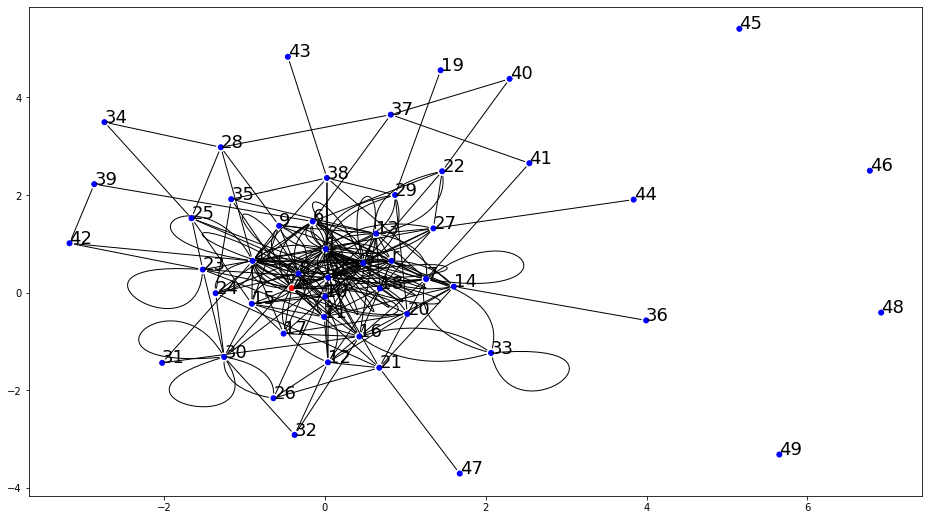

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 9))
vNum=50 # the number of vertices
igraph.plot(g_random, target=ax, vertex_color=["blue"]+["blue"]+["red"]+["blue"]*(vNum-3), 
            vertex_label_size=18, vertex_label_dist=20, vertex_label=['r']+list(range(1,vNum)))

### Visualization of a simplified random graph

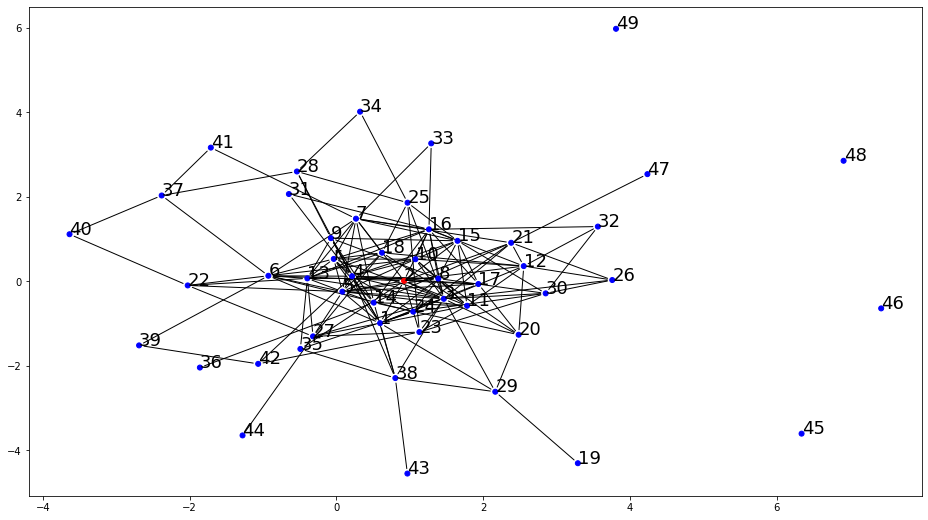

In [13]:
# Generate simplified version of graph by making a copy of the graph and simplify it in place
g_random_simplified = g_random.copy() 
g_random_simplified.simplify()

# visualization
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 9))
vNum=50 # the number of vertices
igraph.plot(g_random_simplified, target=ax, vertex_color=["blue"]+["blue"]+["red"]+["blue"]*(vNum-3), 
            vertex_label_size=18, vertex_label_dist=20, vertex_label=['r']+list(range(1,vNum)))

### Plot both multiple and simplified graphs

NameError: name 'ig' is not defined

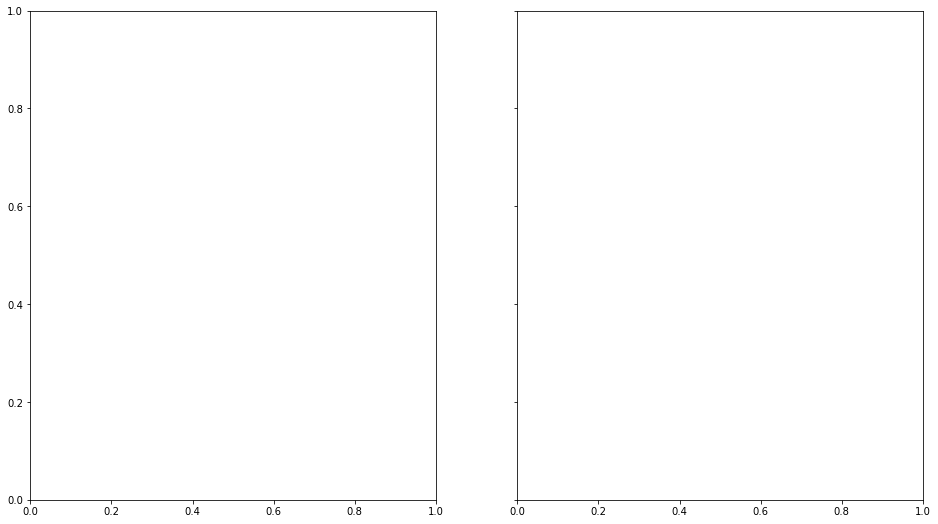

In [16]:
# Plot both graphs
visual_style = {
    "vertex_color": "lightblue",
    "vertex_size": 0.4, 
    "vertex_label": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                        24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
}

# Make twin axes
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(16, 9))

# Plot both graphs
ig.plot(
    g_random,
    layout="circle",
    target=axs[0],
    **visual_style,
)
ig.plot(
    g_random_simplified,
    layout="circle",
    target=axs[1],
    **visual_style,
)

# Set titles
axs[0].set_title('Multigraph_g_random')
axs[1].set_title('Simplified_g_random')
plt.show()

### 1. Average highest damage with some iterations on graph g_random

In [ ]:
result = maxDamage(g_random, the_greedy_optimized, 5) # g_random is a graph
print(result)
print("")
print(f" The average max damage =  {sum(result[1])/len(result[1])}")

### 2. Results by random root examination on graph g_random

In [ ]:
calling_fire_random(g_random)

### 3. outcome on one chosen vertex on graph g_random

In [ ]:
n= [len(g_random.vs)]
print("The number of vertices: ",n) 

totalBurnt, protected, ratio = fire(g_random,2, the_greedy) # root is 2 in graph g_random
print(f"Total burnt vertices: {totalBurnt}, Protected vertices: {protected}, and Damage: {ratio}%")

In [ ]:
n= [len(g_random.vs)]
print("The number of vertices: ",n) 

totalBurnt, protected, ratio = fire(g_random,2, the_greedy_optimized) # root is 2 in graph g_random
print(f"Total burnt vertices: {totalBurnt}, Protected vertices: {protected}, and Damage: {ratio}%")

## Creating a table with parameters m and n in a random growing graph (The Greedy Opt)

In [ ]:
import pandas as pd

m = range(2,6) # m is the number of edges added in each step
n = range(1,51)# n is the number of vertices 

table1 = pd.DataFrame(index=m, columns=n)


for i in m:
    for j in n:
        damages = []
        for x in range(1000):# running for loop for 1000 times
            g_random = igraph.Graph.Growing_Random(j, i, directed=False, citation=False)
            _,_,d = fire(g_random, 0, the_greedy_optimized)
            damages.append(d)
        table1.loc[i,j] = sum(damages)/len(damages)

table1  

## Creating a plot to show the amount of damage with the growth of vertices

In [ ]:
from matplotlib import pyplot as plt

fig1, ax1 = plt.subplots(figsize=(16, 9))

ax1.plot(table1.columns, table1.loc[2], label="m=2") # each step 2 edges are added after adding a new vertex
ax1.plot(table1.columns, table1.loc[3], label="m=3") # each step 3 edges are added after adding a new vertex
ax1.plot(table1.columns, table1.loc[4], label="m=4") # each step 4 edges are added after adding a new vertex
ax1.plot(table1.columns, table1.loc[5], label="m=5") # each step 5 edges are added after adding a new vertex

ax1.set_xlabel("number of vertices", fontsize=15)
ax1.set_ylabel("damages ratio", fontsize=15)

_=ax1.legend()

# Set titles
ax1.set_title('The greedy optimized algorithm on Growing random graph', fontsize=20)
fig1.show()

## Report for plot 1
### As we see, with one vertex and adding one vertex at each step, damage ratio is 100% and with two vertices, it decreases to 50%. As the number of edges goes up with the fix number of v, the damge is inceasing.  As the number of vertices goes up with the numner of edges, damage is increasing with more than 10 vertices. There is a slight decrease when the number of vertices is less than 10.  

## Mean in a growing random graph

In [ ]:
print(table1.loc[2].mean()) 
print("")
print(table1.loc[3].mean()) 
print("")
print(table1.loc[4].mean())
print("")
print(table1.loc[5].mean())

## b. Create Erdős–Rényi graph called g_np

In [ ]:
#              There are two closely related variants of the Erdős–Rényi random graph model 

#1. In the G(n,M) model, a graph is chosen uniformly at random from the collection of all graphs which have 
#   n vertex and M edge. code: Erdos_Renyi(n, p, m, directed=False, loops=False)

#2. In the G(n,p) model, a graph is constructed by connecting labeled nodes randomly. Each edge is included in the
#   graph with probability p, independently from every other edge. Erdos_Renyi(n, p, directed=False, loops=False)


# n: the number of vertices.
# p: the probability of edges. If given, m must be missing.
# m: the number of edges. If given, p must be missing.
# directed: whether to generate a directed graph.
# loops: whether self-loops are allowed.


import random 
random.seed(123) # this code makes we get the same random graph whenever we run it

g_np = igraph.Graph.Erdos_Renyi(n=20, p=0.1, directed=False, loops=False)

# g_np is an undirected and loopless graph with 10 vertices and probablity of 0.1 of edge connection

### Visualization

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 9))
vNum=20 # the number of vertices
igraph.plot(g_np, target=ax, vertex_color=["red"]+["blue"]*(vNum-1), 
            vertex_label_size=18, vertex_label_dist=20, vertex_label=['r']+list(range(1,vNum)))

### 1. Average highest damage with some iterations on graph g_np

In [ ]:
result = maxDamage(g_np, the_greedy_optimized, 5) # g_random is a graph
print(result)
print("")
print(f" The average max damage =  {sum(result[1])/len(result[1])}")

### 2. Results by random root examination on graph g_np

In [ ]:
calling_fire_random(g_np)

### 3. outcome on one chosen vertex on graph g_np

In [ ]:
n= [len(g_np.vs)]
print("The number of vertices: ",n) 

totalBurnt, protected, ratio = fire(g_np,2, the_greedy_optimized) # root is 2 in graph g_random
print(f"Total burnt vertices: {totalBurnt}, Protected vertices: {protected}, and Damage: {ratio}%")

## Creating a table with parameters p and n in a Erdős–Rényi  graph (The Greedy opt)

In [ ]:
import numpy as np

n = range(10,41) # n is the number of vertices
p = np.arange(0,1,0.1) # p is the probability of adjacency ranging from 0 to 1 in each step 0.1 
p = [str(x) for x in p] # converting float to string to creteate a table

table2 =pd.DataFrame(index=p, columns=n)

for i in p:
    for j in n:
        damages = []
        for x in range(1000): # running for loop for 1000 times
            g_np = igraph.Graph.Erdos_Renyi(j, float(i), directed=False, loops=False)
            _,_,d = fire(g_np, 0, the_greedy_optimized)
            damages.append(d)
            
        table2.loc[i,j] = sum(damages)/len(damages)
        #print(i,j)

table2 



# By this code we run for loop for 1000 times in a graph. In this graph, we place fire function in a set d and
# each time add it to the list of damages. Then we drow a table to show damages ratio.

## Creating a plot to show the amount of damage with the growth of vertices

In [ ]:
from matplotlib import pyplot as plt

fig2, ax2 = plt.subplots(figsize=(16, 9))

for label in table2.index:
    #print(label)

    ax2.plot(table2.columns, table2.loc[label], label=f"p={label}") 

ax2.set_xlabel("number of vertices", fontsize=15)
ax2.set_ylabel("damages ratio", fontsize=15)

_=ax2.legend()  # _= to stop a sentence that is printed

# Set titles
ax2.set_title('The greedy optimized algorithm on Erdos_Renyi graph', fontsize=20)
plt.show()

## Report for plot 2
### As we see, with one vertex in any probability, damage ratio is 100% and with two vertices, it decreases to 50%. As probablity p goes up with the fix number of v, the damge is inceasing.  As the number of vertices goes up with the low posiblity of edge connection, damage is decreasing (blue line). As both the number of vertices and p are increasing, damage is increasing.  Increasing damage is noticable when the number of vertices is more than 10 and p=0.3. 